In [1]:
import tensorflow as tf

In [2]:
var = tf.random.uniform([1])
print(var.numpy())

[0.7745898]


In [3]:
# create mock data
# using tf.random to add some noise to data

def data_creation(w=0.1, b=0.5, n=100):
    X = tf.random.uniform(shape=[n]) # input data
    noise = tf.random.normal(shape=[n], mean=0.0, stddev=0.01)
    Y = X*w+b+noise
    return X.numpy(), Y.numpy() # convert X from tf representation to regular array 

X, Y = data_creation()

In [4]:
%matplotlib inline 
# '%' for magic word: run internal cmd that jupyter notebook will recognize
# all imgs created by matplotlib will be printed out in the notebook
import matplotlib.pyplot as plt

(array([10., 12.,  8.,  6.,  9.,  9., 10., 12., 10., 14.]),
 array([0.01358557, 0.10467607, 0.19576657, 0.28685707, 0.37794757,
        0.46903807, 0.56012857, 0.65121907, 0.74230957, 0.83340007,
        0.92449057]),
 <BarContainer object of 10 artists>)

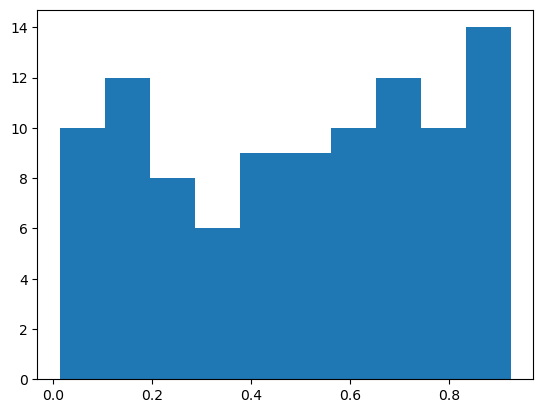

In [5]:
plt.hist(X)

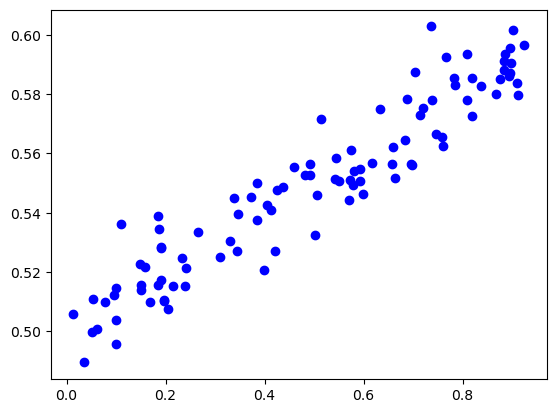

In [6]:
plt.plot(X, Y, 'bo')

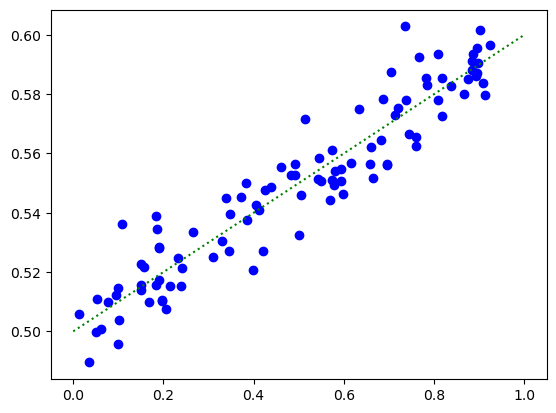

In [7]:
# assume above is our input data, and we don't know the values of w and b;
# we want to find w and b that will fit the above distribution of data;
# basically, we are trying to get to these ideal values of w and b
# (which we used for mock data creation above):
w=0.1
b=0.5
plt.plot(X, Y, 'bo')
plt.plot([0,1], [0*w+b, 1*w+b], 'g:') # ploting x in range [0,1], y as func
 

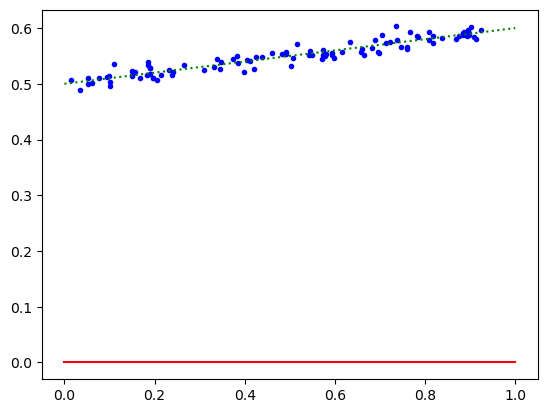

In [8]:
# if we assume we don't know w and b, that we only have some measurement data,
# which represents the dependency btw two values (X and Y - e.g. height and shoe size)
# so we start with guesses:
w_guess = 0.0
b_guess = 0.0
plt.plot(X, Y, 'b.')
plt.plot([0,1], [0*w+b, 1*w+b], 'g:')
plt.plot([0,1], [0*w_guess+b_guess, 1*w_guess+b_guess], 'r-')

# our goal is to get from the red guess line to the green ideal line by tweaking w and b;
# to fit our red (guess) line to the green (actual) line

In [15]:
# we need to find the error value, how far our predictions are from the solution/actual data;
# can simply measure distance btw our prediction line points and actual values
# (e.g. take square of difference btw each point, and get the avg)

def predict(x, w, b):
    y = x * w + b
    return y

# calculated how far we are from the solution, our loss func
def mean_squared_error(y_predictions, Y):
    return tf.reduce_mean(tf.square(Y - y_predictions)) # calculate mean for all given args




In [16]:
 # just for comparison:
print(mean_squared_error(predict(X, w_guess, b_guess), Y))
print(mean_squared_error(predict(X, w, b), Y)) # not 0 because we are comparing against actual data with noise, the blue dots above

tf.Tensor(0.30261087, shape=(), dtype=float32)
tf.Tensor(8.8990055e-05, shape=(), dtype=float32)


In [25]:
# we need to minimize the loss, to get to ideal w and b 
# by using differentiation in the process of back-propagation:
# differentiation tells us how to change w and b to slightly decrease the loss
# (we are now reproducing what neural network is doing during training)

# derivatives tell us which way we should go - should we increase or decrease the w
# tensorflow can calculate all derivatives in single method using gradient tape

# initialize with random vals
w = tf.Variable(0.0)
b = tf.Variable(-1.0)

learning_rate = 0.1 

# learning rate should be a small adjustment to avoid overshooting
# slowly getting to the minimum - we end up oscillating / making small jumps back and forth around the minimum, we never get to the exact min
# one common trick is to decrease the learning rate as you get near to it in order to get closer to it 
# we won't get to the exact minimum, but close enough

steps = 200 # n steps to get to solution

for step in range(steps):
    # creating an environment in which tf is keeping track of arithmetical operations within this code block
    with tf.GradientTape() as tape:
        predictions = predict(X, w=w, b=b  )
        loss = mean_squared_error(predictions, Y)

    # get gradient(s), direction in which you want to modify value/values to get to minimum loss
    # second arg is a list of vals we want to modify, returns a list of gradients, one for each elem in that list
    gradients = tape.gradient(loss, [w, b]) 
    w.assign_sub(gradients[0] * learning_rate) # subtract given arg from w
    b.assign_sub(gradients[1] * learning_rate)

    if step%20==0:
        print("Step {}".format(step))
        print("loss {}".format(loss))


# hyper-parameters:
# learning_rate and n steps are hyper-parameters - they control how we train the model
# too small learning rate - you might need more steps to get to minimum loss
# too large learning rate - you jump out of your minimum


Step 0
loss 2.4012975692749023
Step 20
loss 0.01393814291805029
Step 40
loss 0.008618820458650589
Step 60
loss 0.005350714549422264
Step 80
loss 0.00333473552018404
Step 100
loss 0.0020911472383886576
Step 120
loss 0.0013240218395367265
Step 140
loss 0.0008508095052093267
Step 160
loss 0.0005589016946032643
Step 180
loss 0.0003788339381571859


In [21]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.14745232>

In [22]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.47485676>

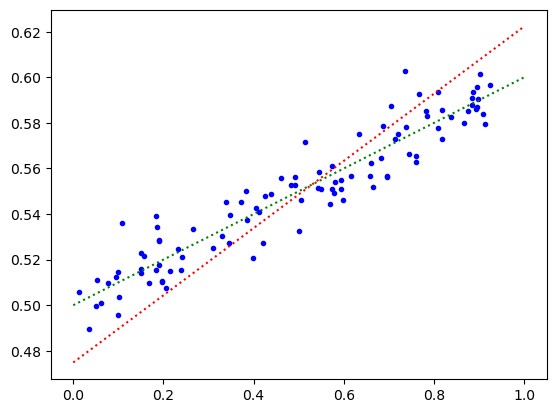

In [23]:
w_true = 0.1
b_true = 0.5
plt.plot(X, Y, 'b.')
plt.plot([0,1], [0*w_true+b_true, 1*w_true+b_true], 'g:')
plt.plot([0,1], [0*w+b, 1*w+b], 'r:')

In [ ]:
# neural network
# loss func as measurement of prediction accuracy:
# if the input is an img of hotdog, and the output is "not hotdog" - loss func returns a big value;
# then we can calculate derivatives of loss for all weights/biases in NN,
# so as to figure out how to modify those weights/biases in order to get to the correct answer;
# essentially the same alg on a much larger scale:
# principle is the same:
# provide input data and expected output;
# then keeping track of what is happening and calculating how ws and bs should be tweaked 
# to get to correct result with a similar input